<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 1) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E03_Tu_Rut.ipynb" a "E03_12345678-9.ipynb"


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [2]:
import numpy as np
import IPython
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq



# 3) Convolución 1D - Continua

(1 Punto)

Encontrar $y(t) = x(t) * g(t)$ para la siguientes funciones. Asuma que las funciones $x(t)$ y $g(t)$ han sido muestreadas en $t$, de tal forma que $t_i = i/100 - 3$ para $i=0, 1, \cdots 600$, es decir $x_i = x(t_i)$, $g_i = g(t_i)$, $y_i = y(t_i)$. Debe graficar las tres funciones.

Para resolver este problema, en un papel resuelva la convolución continua, luego grafique los resultados.




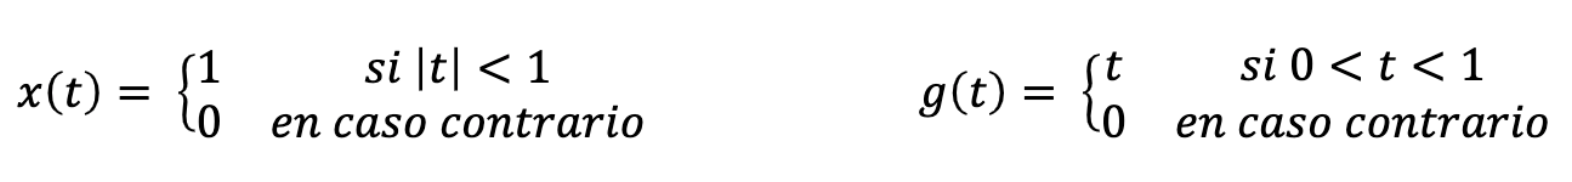

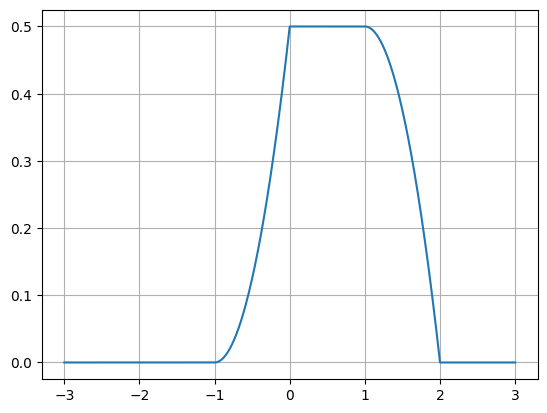

In [13]:
# Aquí la representación gráfica de lo hecho en papel
x1 = np.linspace(-3, -1, 100)
x2 = np.linspace(-1, 0, 100)
x3 = np.linspace(0, 1, 100)
x4 = np.linspace(1, 2, 100)
x5 = np.linspace(2, 3, 100)

y1 = np.zeros_like(x1)
y2 = (x2 + 1)**2 / 2
y3 = np.full_like(x3, 1/2) # no supe expresarlo de mejor forma
y4 = 1/2 - (x4 - 1)**2 / 2
y5 = np.zeros_like(x5)

# Unimos los valores de x y y
x = np.concatenate((x1, x2, x3, x4, x5))
y = np.concatenate((y1, y2, y3, y4, y5))

# Graficamos
plt.plot(x, y)
plt.grid(True)
plt.show()


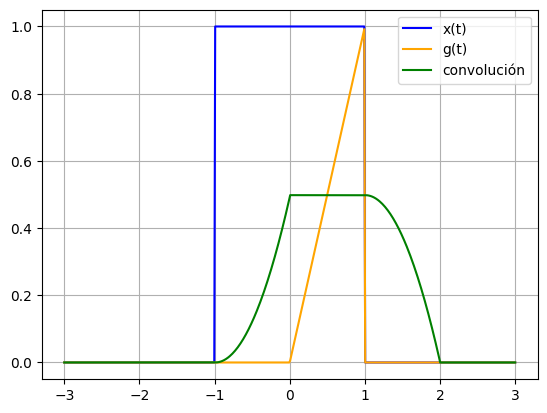

In [ ]:
# Vemos aquí como debería quedar la gráfica, comparando lo anterior con el resultado real:
def x(t):
    return np.where(np.abs(t) < 1, 1, 0)

def g(t):
    return np.where((t > 0) & (t < 1), t, 0)

t = np.linspace(-3, 3, 500)  # 500 puntos entre -3 y 3
x_t = x(t)
g_t = g(t)

convolucion = np.convolve(x_t, g_t, mode='same') * (t[1] - t[0])

plt.plot(t, x_t, label='x(t)', color='b')
plt.plot(t, g_t, label='g(t)', color='orange')
plt.plot(t, convolucion, label='convolución', color='g')

plt.grid(True)
plt.legend()
plt.show()


# 4) Convolución 1D - discreta
(1 Punto)

Realice la convolución discreta de las siguientes funciones:

Para resolver este problema puede usar la función de convolución discreta de Python.


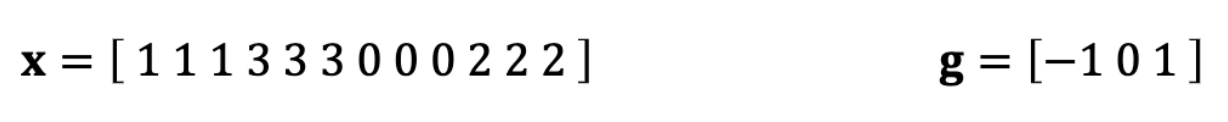

In [ ]:
np.convolve([1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 2, 2], [-1, 0, 1])

array([-1, -1,  0, -2, -2,  0,  3,  3,  0, -2, -2,  0,  2,  2])

# 5.1) Separación de señales usando Fourier (Gong)

(6 puntos)

Usando la transformada de Fourier en 1D, a partir del sonido mezclado del gong con el canto del pájaro, produzca una señal de audio en que se escuche principalmente el gong. Use una función de audio para esuchar esta señal.

El archivo `wav` del sonido mezclado se encuentra en `https://www.dropbox.com/s/w7dj38xfkubj9v5/gongbird.wav`

*Este problema puede ser resuelto usando el ejemplo simple visto en clases (no es necesario usar ninguna de las funciones de los ejemplos 'avanzados').*

En la solución debe incluir:

* la gráfica de la señal original y filtrada en el dominio del tiempo

* la gráfica de la señal original y filtrada  en el dominio de la frecuencia

* audio de la señal  original y filtrada

In [ ]:
!wget https://www.dropbox.com/s/w7dj38xfkubj9v5/gongbird.wav


--2024-09-26 15:01:48--  https://www.dropbox.com/s/w7dj38xfkubj9v5/gongbird.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/poxqapt1pdfdkmy1taehh/gongbird.wav?rlkey=wfcty1lujmb7596wu8vgdijk7 [following]
--2024-09-26 15:01:49--  https://www.dropbox.com/scl/fi/poxqapt1pdfdkmy1taehh/gongbird.wav?rlkey=wfcty1lujmb7596wu8vgdijk7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb325bdf61792f706439cfb0b1f.dl.dropboxusercontent.com/cd/0/inline/CbXpFGYNsuDKOshxcTvZXHzBV75DQpl4iGrFkew92E0Y9XmOe0cjIlB3DWvWEL_781uXE4EdJnuUzkmN93aGZuSeSS1HPDCEr4ISXtku03EZRvbzE0tSJ1Lo1VQwk1hCAvI/file# [following]
--2024-09-26 15:01:50--  https://ucb325bdf61792f706439cfb0b1f.dl.dropboxusercontent.com/cd/0/inline/CbXpFGYNsuDKOshxcTvZXH

In [ ]:
path = "gongbird.wav"
IPython.display.Audio(path)


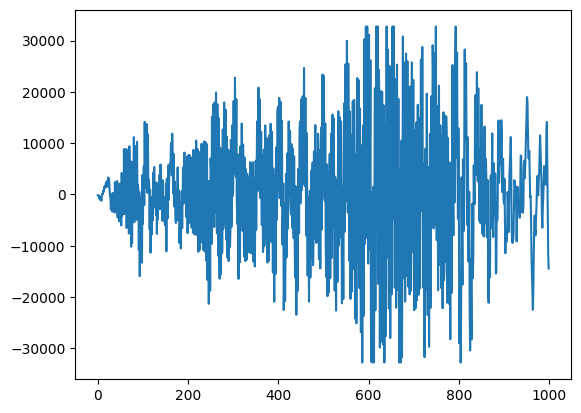

In [ ]:
SAMPLE_RATE, y_original = wavfile.read(path)
plt.plot(y_original[:1000])
plt.show()

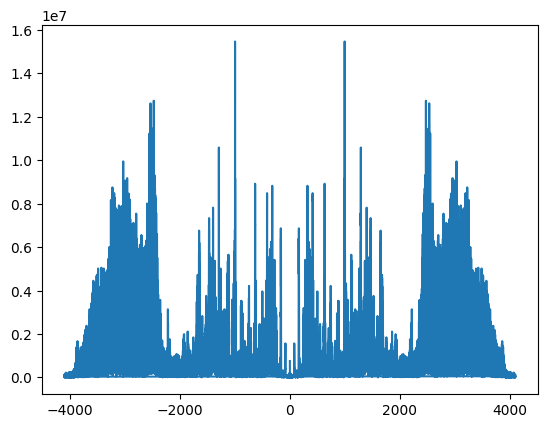

In [ ]:
# Number of samples in y_original
N = len(y_original) # = SAMPLE_RATE * DURATION

yf = fft(y_original)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

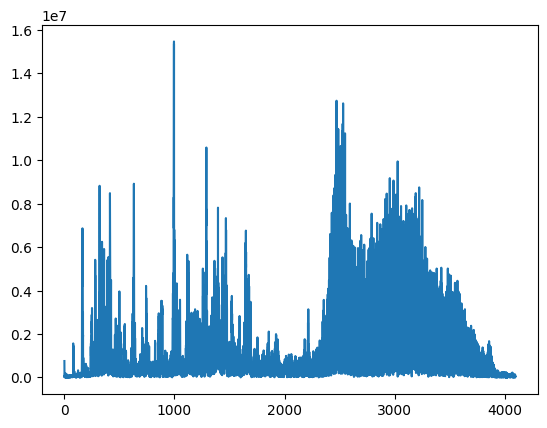

In [ ]:

from scipy.fft import rfft, rfftfreq
# Note the extra 'r' at the front
yf = rfft(y_original)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

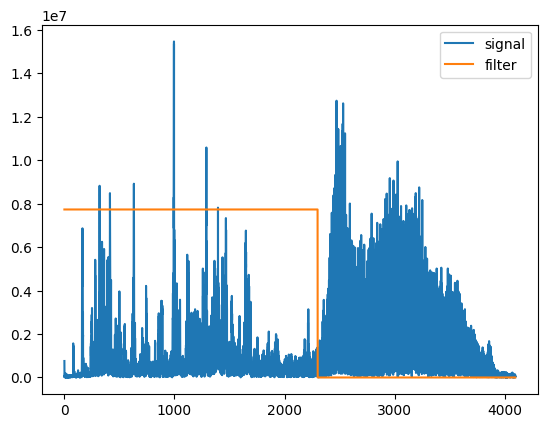

In [ ]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

target_idx = int(points_per_freq * 2300)

yf_abs = np.abs(yf)

plt.plot(xf,yf_abs)

hf = np.ones((len(xf),))
hf[target_idx:] = 0
plt.plot(xf, hf*np.max(yf_abs)/2)
plt.legend(['signal','filter'])
plt.show()

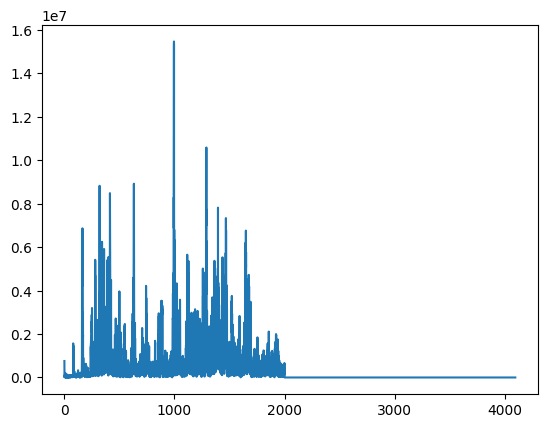

In [ ]:
yff = np.multiply(yf,hf)
plt.plot(xf, np.abs(yff))
plt.show()

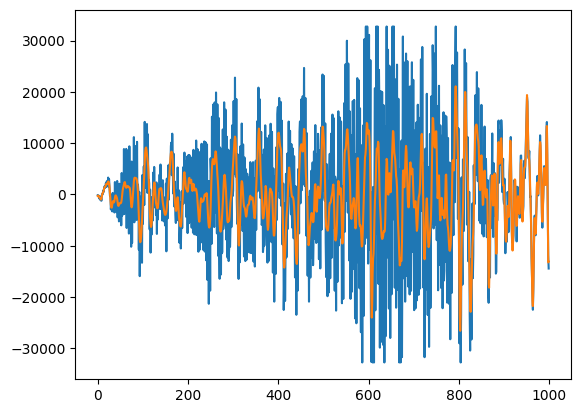

In [ ]:
from scipy.fft import irfft

y_filtered_real = irfft(yff).real
y_filtered      = y_filtered_real.astype(np.int16)

plt.plot(y_original[:1000])
plt.plot(y_filtered[:1000])
plt.show()

In [ ]:
wavfile.write("filtered.wav", SAMPLE_RATE, y_filtered)

In [ ]:
IPython.display.Audio('filtered.wav')

# 5.2) Separación de señales usando Fourier (Canto del Pájaro)

(2 puntos)

A partir del resultado de la pregunta anterior, produzca una señal de audio en que se escuche principalmente el canto del pájaro.



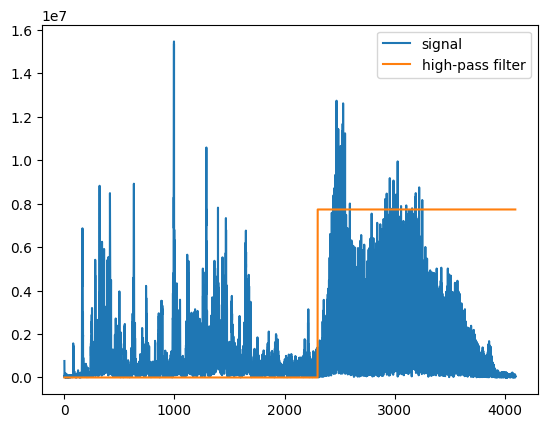

In [ ]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Frecuencia de corte (por ejemplo, 2300 Hz)
target_idx = int(points_per_freq * 2300)

yf_abs = np.abs(yf)

plt.plot(xf, yf_abs)

# Crear el filtro paso alto
hf = np.ones((len(xf),))
hf[:target_idx] = 0  # Bloquear frecuencias bajas

# Aplicar el filtro al espectro de frecuencias
plt.plot(xf, hf * np.max(yf_abs) / 2)
plt.legend(['signal', 'high-pass filter'])
plt.show()


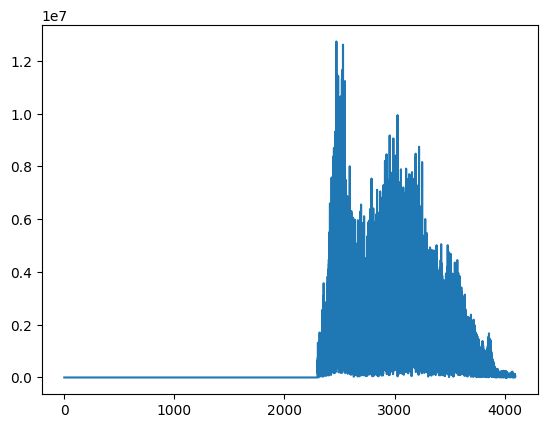

In [ ]:
yff = np.multiply(yf,hf)
plt.plot(xf, np.abs(yff))
plt.show()

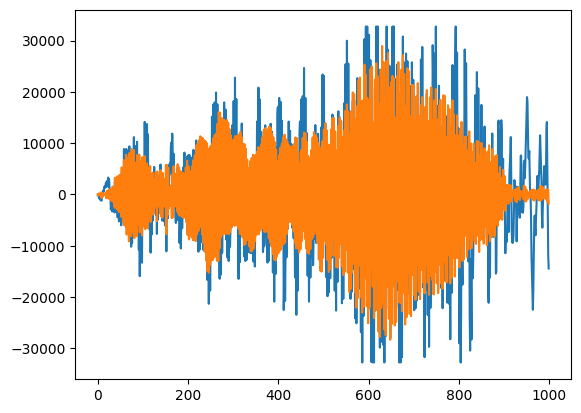

In [ ]:
y_filtered_real = irfft(yff).real
y_filtered      = y_filtered_real.astype(np.int16)

plt.plot(y_original[:1000])
plt.plot(y_filtered[:1000])
plt.show()

In [ ]:
wavfile.write("filtered2.wav", SAMPLE_RATE, y_filtered)

In [ ]:
IPython.display.Audio('filtered2.wav')

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

